<a href="https://colab.research.google.com/github/peisuke/ml-works/blob/main/3/3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.1 最小２乗法を用いたクラス分類
- 目的
    - 最小２乗法を用いた分類の特性を学ぶ
- 内容
    - まずはノイズのないデータに対して分類を行う
    - 次に外れ値のあるデータに対して分類を行う
- 参考
    - 本コードは以下のサイトを参考にしました
    - https://aidiary.hatenablog.com/entry/20100424/1272075531

In [1]:
import numpy as np
from pylab import *
import sys

In [2]:
# Kをクラス数、Nをデータ数とする
K = 2
N = 100

In [3]:
# 最小2乗法で計算したパラメータを用いて、xに対応するyの値を返す
def f(x1, W_t):
    # 決定境界の直線の方程式
    a = - ((W_t[0,1]-W_t[1,1]) / (W_t[0,2]-W_t[1,2]))
    b = - (W_t[0,0]-W_t[1,0])/(W_t[0,2]-W_t[1,2])
    return a * x1 + b

## ノイズなしデータでの実験

In [4]:
# 訓練データを作成
cls1 = []
cls2 = []

# データは正規分布に従って生成
mean1 = [-1, 2]  # クラス1の平均
mean2 = [1, -1]  # クラス2の平均
cov = [[1.0,0.8], [0.8,1.0]]

# ノイズなしデータ
cls1.extend(np.random.multivariate_normal(mean1, cov, N//2))
cls2.extend(np.random.multivariate_normal(mean2, cov, N//2))

# データ行列Xを作成
temp = vstack((cls1, cls2))
temp2 = ones((N, 1))  # バイアスw_0用に1を追加
X = hstack((temp2, temp))

# ラベル行列T（1-of-K表記）を作成
T = []
for i in range(N//2):
    T.append(array([1, 0]))  # クラス1
for i in range(N//2):
    T.append(array([0, 1]))  # クラス2
T = array(T)

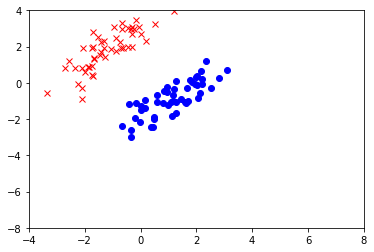

In [5]:
# 訓練データを表示
plot(np.array(cls1)[:,0], np.array(cls1)[:,1], 'rx')
plot(np.array(cls2)[:,0], np.array(cls2)[:,1], 'bo')
xlim(-4, 8)
ylim(-8, 4)
show()

In [6]:
# パラメータ行列Wを最小二乗法で計算
# 第2回講座の多次元での線形回帰における最小二乗法の計算(p.38)より
X_t = np.transpose(X) # Xの転置をX_tとする
temp = np.linalg.inv(np.dot(X_t, X)) # X_tとXの内積
W = np.dot(np.dot(temp, X_t), T)
W_t = np.transpose(W)
print(W_t)

[[ 0.40654869 -0.1989354   0.17870972]
 [ 0.59345131  0.1989354  -0.17870972]]


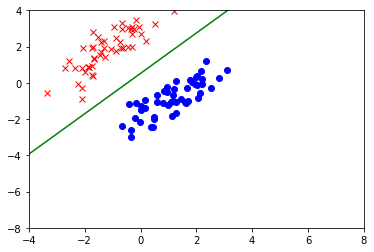

In [7]:
# 訓練データを描画
x1, x2 = np.transpose(np.array(cls1))
plot(x1, x2, 'rx')

x1, x2 = np.transpose(np.array(cls2))
plot(x1, x2, 'bo')

# 識別境界を描画
# ノイズの無いデータの場合は、適切に境界を決定できる
x1 = np.linspace(-4, 8, 1000)
x2 = [f(x, W_t) for x in x1]
plot(x1, x2, 'g-')

xlim(-4, 8)
ylim(-8, 4)
show()

## ノイズありデータでの実験

In [8]:
 # 訓練データを作成
cls1 = []
cls2 = []

mean1 = [-1, 2]  # クラス1の平均
mean2 = [1, -1]  # クラス2の平均
mean3 = [8, -6]  # クラス2のノイズデータの平均
cov = [[1.0,0.8], [0.8,1.0]] 

# ノイズありデータ
cls1.extend(np.random.multivariate_normal(mean1, cov, N//2))
cls2.extend(np.random.multivariate_normal(mean2, cov, N//2-20))
cls2.extend(np.random.multivariate_normal(mean3, cov, 20))  # 20個だけクラス2にノイズデータ追加

# データ行列Xを作成
temp = vstack((cls1, cls2))
temp2 = ones((N, 1))  # バイアスw_0用に1を追加
X = hstack((temp2, temp))

# ラベル行列T（1-of-K表記）を作成
T = []
for i in range(N//2):
    T.append(array([1, 0]))  # クラス1
for i in range(N//2):
    T.append(array([0, 1]))  # クラス2
T = array(T)

In [9]:
# 先程と同様にパラメータ行列Wを最小二乗法で計算
X_t = np.transpose(X)
temp = np.linalg.inv(np.dot(X_t, X))
W = np.dot(np.dot(temp, X_t), T)
W_t = np.transpose(W)
print(W_t)

[[ 0.60055352 -0.02312304  0.10409539]
 [ 0.39944648  0.02312304 -0.10409539]]


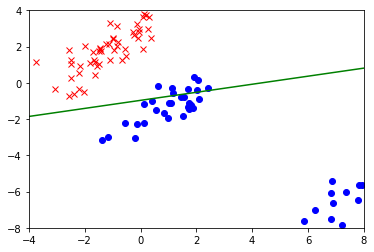

In [10]:
# 訓練データを描画
x1, x2 = np.transpose(np.array(cls1))
plot(x1, x2, 'rx')

x1, x2 = np.transpose(np.array(cls2))
plot(x1, x2, 'bo')

# 識別境界を描画
# データがノイズを持つ場合、分類境界が適切に計算できない
x1 = np.linspace(-4, 8, 1000)
x2 = [f(x, W_t) for x in x1]
plot(x1, x2, 'g-')

xlim(-4, 8)
ylim(-8, 4)
show()